In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
import os
from tqdm import tqdm
import csv
import operator

In [31]:
# 파일 읽기(모든 상품데이터가 셔플된 csv) 
os.chdir("C:/ssafy/test1/real") 
file = open('fs.csv', 'r')
data = pd.read_csv(file)
data=data.astype(str)

In [32]:
data[:5]

,식품,종류
0,제과 해태제과 해태,과자
1,디저뜨와 브라우니 타르트,가공식품
2,소화가잘되는우유,유제품
3,종가집 백열무물김치,김치
4,밀가루 곰표 포대 고급 g,가공식품


In [33]:
# 상품데이터 
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 301978


In [34]:
# 상품종류를 특정 idx로 바꿔준다
data['종류'] = data['종류'].replace(['돼지고기', '쇠고기', '닭고기', '알류', '축산가공식품', '생선', '김/해초','해산물/어패류','젓갈','건어물','아이스크림/빙수',
                                 '냉동/간편조리식품','쌀', '잡곡/혼합곡', '과일', '채소','견과류','반찬','김치','음료','차류','커피','유제품','과자','가공식품' ],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

In [35]:
data[0:50]

,식품,종류
0,제과 해태제과 해태,23
1,디저뜨와 브라우니 타르트,24
2,소화가잘되는우유,22
3,종가집 백열무물김치,18
4,밀가루 곰표 포대 고급 g,24
5,매일 뼈로가는 고칼슘두유밥대용음료 밥,22
6,동원 양반죽양반김 도시락김 8매단팥 쇠고기 야채 참,11
7,대용량 식자재 701양조간장12,24
8,트로피카나 오렌지 주스2 코스트코,19
9,set 호로록 버터칼,22


In [36]:
data['식품'].nunique(), data['종류'].nunique()


(270887, 25)

In [37]:
print(data['종류'].unique())

[23 24 22 18 11 19  3  0 14 16 13 15  8 10  1  4 21  7 17  9 12  5 20  2
  6]


In [38]:
data.drop_duplicates(subset=['식품'], inplace=True)

In [39]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 270887


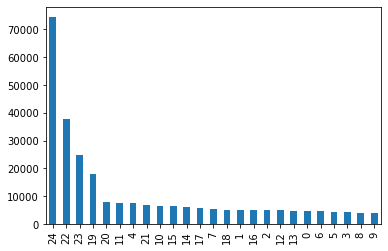

In [40]:
data['종류'].value_counts().plot(kind='bar');

In [41]:
X_data = data['식품']
y_data = data['종류']
print('식품의 개수: {}'.format(len(X_data)))
print('종류의 개수: {}'.format(len(y_data)))

식품의 개수: 270887
종류의 개수: 270887


In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장
word_to_index = tokenizer.word_index
#print(word_to_index)
# print(type(tokenizer))
X_data = sequences
print(len(word_to_index))
# print(type(word_to_index))

169999


상품이름의 최대 길이 : 31
상품이름의 평균 길이 : 4.761971


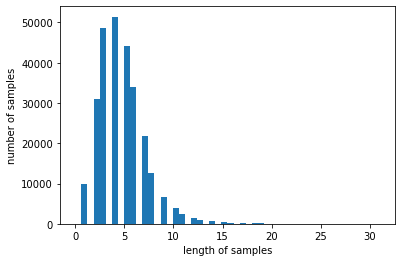

In [1002]:
# 최대 길이, 가식화
print('상품이름의 최대 길이 : %d' % max(len(l) for l in X_data))
print('상품이름의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [1003]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 170000


In [1006]:
# 80% 는 학습 20%는 테스트
n_of_train = int(len(sequences) * 0.85)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 230253
테스트 데이터의 개수: 40634


In [1007]:
max_len = 31
# 전체 데이터셋의 길이는 max_len으로 맞춥니다 (그이상은 안넘어가므로)
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (270887, 31)


In [1008]:
X_test = data[n_of_train:] #X_data 데이터 중에서 뒤의 20%의 데이터만 저장
y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 20%의 데이터만 저장
X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 80%의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 80%의 데이터만 저장

In [1009]:
# to_categorical 함수는 입력받은 (n) 크기의 1차원 정수 배열을 (n, k) 크기의 2차원 배열로 변경
y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블 
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블

In [1010]:
model = Sequential()
#  Embedding()을 사용하여 임베딩 층(embedding layer)을 추가
# 단어 집합의 크기, 임베딩 벡터의 차원
model.add(Embedding(vocab_size, 120))
#  LSTM 셀로 이루어진 layer 추가
#  RNN 알고리즘 의 단점을 보완 LSTM
model.add(LSTM(120))

# Softmax(소프트맥스)는 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수이다.
model.add(Dense(25, activation='softmax'))

In [1011]:
# loss 직접적으로 줄이고자 하는 값(손실함수)
# loss가 특정 이하면 EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# 중간중간에 콜백 형태로 진행사항 여부 확인 시켜주는 듯
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [1012]:
# 최적화 알고리즘 adam을 사용한다
# metric 얼마나 잘했는지 에 대한 척도
# categorical_crossentropy : 네트워크(신경망)가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리(가까워야 좋은듯)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [1013]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/30
1799/1799 [==============================] - ETA: 0s - loss: 0.8162 - acc: 0.7880
Epoch 00001: val_acc improved from -inf to 0.88894, saving model to best_model.h5
1799/1799 [==============================] - 393s 219ms/step - loss: 0.8162 - acc: 0.7880 - val_loss: 0.4231 - val_acc: 0.8889
Epoch 2/30
1799/1799 [==============================] - ETA: 0s - loss: 0.1692 - acc: 0.9578
Epoch 00002: val_acc improved from 0.88894 to 0.89797, saving model to best_model.h5
1799/1799 [==============================] - 397s 221ms/step - loss: 0.1692 - acc: 0.9578 - val_loss: 0.4038 - val_acc: 0.8980
Epoch 3/30
1799/1799 [==============================] - ETA: 0s - loss: 0.0688 - acc: 0.9807
Epoch 00003: val_acc did not improve from 0.89797
1799/1799 [==============================] - 396s 220ms/step - loss: 0.0688 - acc: 0.9807 - val_loss: 0.4359 - val_acc: 0.8926
Epoch 4/30
1799/1799 [==============================] - ETA: 0s - loss: 0.0460 - acc: 0.9861
Epoch 00004: val_acc did not i

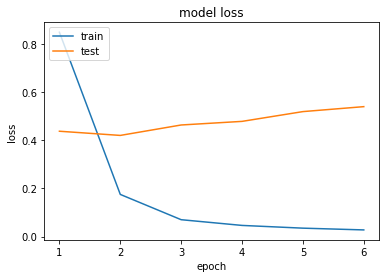

In [923]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [792]:
sl = ["계란 소세지"]
#tokenizer.fit_on_texts(sl)
t = tokenizer.texts_to_sequences(sl) # 단어를 숫자값, 인덱스로 변환하여 저장


word_to_index = tokenizer.word_index
print(t)
print(model.predict(t))
index, value = max(enumerate(model.predict(t)[0]), key=operator.itemgetter(1))
f_list = ['돼지고기', '쇠고기', '닭고기', '알류', '축산가공식품', '생선', '김/해초','해산물/어패류']
print(f_list[index])
print(value)
# 돼지고기', '쇠고기', '닭고기', '알류', '축산가공식품', '생선', '김/해초','해산물/어패류'

[[102, 937]]
[[1.1241159e-02 1.0513966e-04 1.7286354e-03 9.0664768e-01 7.3517263e-02
  4.4767981e-04 9.2825430e-05 1.9519763e-04 6.4559461e-04 7.6772099e-05
  6.3676963e-04 6.2282584e-06 8.6081373e-06 8.8194321e-07 4.4199242e-05
  8.9935993e-06 3.6174008e-03 2.6806458e-05 8.7128353e-07 9.0181077e-04
  3.4810466e-05 1.4735701e-05]]
알류
0.9066477


In [790]:
model.save('C:/ssafy/test1/real/modeltest')

INFO:tensorflow:Assets written to: C:/ssafy/test1/real/modeltest\assets


In [530]:
new_model = load_model('C:/ssafy/test1/modeltest')


In [32]:
new_model.predict(t)

array([[0.23407474, 0.6480626 , 0.0612158 , 0.0566469 ]], dtype=float32)

In [135]:
file.close()

In [1014]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=4)

In [796]:
model.save('best.h5')